In [1]:
import keras
import numpy as np
from keras.applications import vgg16

Using TensorFlow backend.


In [2]:
vgg_model = vgg16.VGG16(weights='imagenet')

In [3]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
from PIL import Image
import cv2


In [20]:
filename = 'test37.jpg'

In [21]:
orginal = load_img(filename)
x3image=load_img(filename,target_size=(672,672))
image = load_img(filename, target_size=(224, 224))

PIL image size (224, 224)
numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


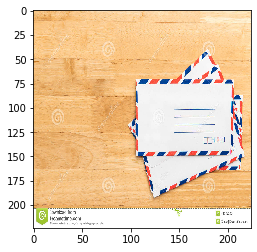

In [22]:
print('PIL image size',image.size)
numpy_image = img_to_array(image)
print('numpy array size',numpy_image.shape)
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [23]:
processed_image = vgg16.preprocess_input(image_batch.copy())
predictions = vgg_model.predict(processed_image)
label = decode_predictions(predictions)
print(label)

[[('n03291819', 'envelope', 0.86675084), ('n02971356', 'carton', 0.10267935), ('n03871628', 'packet', 0.013542297), ('n03729826', 'matchstick', 0.009284691), ('n03127925', 'crate', 0.004538572)]]


In [24]:
def clean(a):
    main_str=a[0][0][1]
    main_prob=a[0][0][2]
    return([main_str,main_prob])

In [25]:
def predict(imae):
    numpy_imae = img_to_array(imae)
    imae_batch = np.expand_dims(numpy_imae, axis=0)
    processed_imae = vgg16.preprocess_input(imae_batch.copy())
    predictions = vgg_model.predict(processed_imae)
    label = decode_predictions(predictions)
    return(label)


In [26]:
main_pred=clean(predict(image))[0]
main_prob=clean(predict(image))[1]

In [27]:
pro_image=orginal.resize(((orginal.size[0]//224)*224,(orginal.size[1]//224)*224))

In [28]:
pro_a=[]
upper=0
lower=pro_image.size[1]//4
while(lower<=pro_image.size[1]):
    left=0
    right=pro_image.size[0]//6
    while(right<=pro_image.size[0]):
        pro_a.append((left,upper,right,lower))
        left+=(pro_image.size[0]//6)//3
        right+=(pro_image.size[0]//6)//3
    upper+=(pro_image.size[1]//4)//2
    lower+=(pro_image.size[1]//4)//2 

In [29]:
clean(predict(pro_image.crop(pro_a[14]).resize((224,224))))#for just checking a section of the image

['envelope', 0.15190066]

In [30]:
a=0
pro_data=[]
prob_dat=[]
for i in pro_a:
    b=clean(predict(pro_image.crop(i).resize((224,224))))
    b.append(a)
    print(b," index ",a)
    a+=1
    pro_data.append(b)
    prob_dat.append(b[1])

['crate', 0.2729849, 0]  index  0
['crate', 0.53379226, 1]  index  1
['crate', 0.2929205, 2]  index  2
['crate', 0.20692165, 3]  index  3
['nail', 0.06470954, 4]  index  4
['crate', 0.099559054, 5]  index  5
['crate', 0.16608657, 6]  index  6
['crate', 0.19492483, 7]  index  7
['crate', 0.44438562, 8]  index  8
['crate', 0.6698549, 9]  index  9
['crate', 0.60340333, 10]  index  10
['racket', 0.06750329, 11]  index  11
['envelope', 0.29989833, 12]  index  12
['envelope', 0.12904114, 13]  index  13
['envelope', 0.15190066, 14]  index  14
['basketball', 0.17650764, 15]  index  15
['crate', 0.14399916, 16]  index  16
['crate', 0.2536677, 17]  index  17
['crate', 0.10706829, 18]  index  18
['crate', 0.16745809, 19]  index  19
['nail', 0.07416221, 20]  index  20
['crate', 0.12878226, 21]  index  21
['envelope', 0.6597996, 22]  index  22
['envelope', 0.73174924, 23]  index  23
['envelope', 0.5507823, 24]  index  24
['crate', 0.43818495, 25]  index  25
['envelope', 0.58121914, 26]  index  26
[

In [38]:
z=[]
for i in range(10):
    z.append(max(prob_dat))
    prob_dat.remove(max(prob_dat))

In [39]:
pro_data_ref_num=[]
test_list=[]
for  i in pro_data:
    if(i[0]==main_pred and i[1]>=0.65*max(prob_dat) and i[1]>=min(z)):
        
        test_list.append(i[1])
        print(i)
        pro_data_ref_num.append(i[2])

['envelope', 0.73174924, 23]
['envelope', 0.7665498, 27]
['envelope', 0.8686297, 40]
['envelope', 0.79546887, 41]
['envelope', 0.7823188, 43]
['envelope', 0.73832935, 45]
['envelope', 0.79150647, 47]
['envelope', 0.95600647, 72]
['envelope', 0.9683705, 73]
['envelope', 0.8250945, 74]
['envelope', 0.952654, 88]
['envelope', 0.97279775, 89]
['envelope', 0.9604057, 90]
['envelope', 0.8840062, 91]


(434, 112, 620, 336)
(682, 112, 868, 336)
(496, 224, 682, 448)
(558, 224, 744, 448)
(682, 224, 868, 448)
(806, 224, 992, 448)
(930, 224, 1116, 448)
(496, 448, 682, 672)
(558, 448, 744, 672)
(620, 448, 806, 672)
(496, 560, 682, 784)
(558, 560, 744, 784)
(620, 560, 806, 784)
(682, 560, 868, 784)


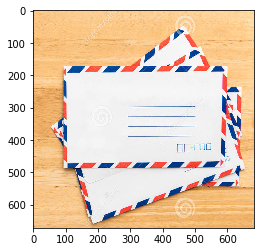

In [40]:
fle=[]
fri=[]
flo=[]
fup=[]
for i in pro_data_ref_num:
    print(pro_a[i])
    fle.append(pro_a[i][0])
    fri.append(pro_a[i][2])
    flo.append(pro_a[i][3])
    fup.append(pro_a[i][1])
plt.imshow(pro_image.crop((min(fle),min(fup),max(fri),max(flo))))

envelope


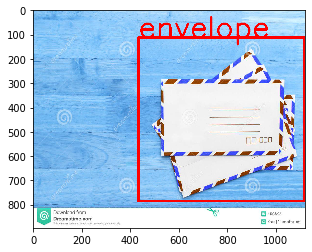

In [41]:
pro_image.save('1.jpg')
img=cv2.imread('1.jpg',cv2.IMREAD_COLOR)
cv2.rectangle(img,(min(fle),min(fup)),(max(fri),max(flo)),(255,0,0),10)
font=cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,main_pred,(min(fle),min(fup)),font,4,(255,0,0),8,cv2.LINE_AA)
plt.imshow(np.uint8(img))
print(main_pred)